In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# 1. Data Analysis

**Top Occupations with Insomnia**

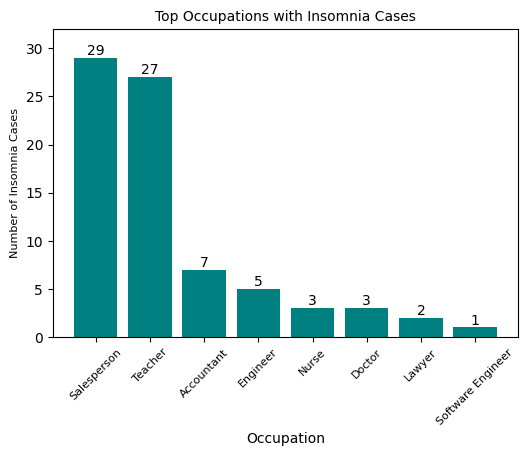

In [ ]:
insomnia_data = data[data['Sleep Disorder'] == 'Insomnia']
occupation_insomnia_counts = insomnia_data['Occupation'].value_counts()

plt.figure(figsize=(6, 4))

bars = plt.bar(occupation_insomnia_counts.index, occupation_insomnia_counts.values, color='teal')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center', fontsize=10)

plt.title('Top Occupations with Insomnia Cases', fontsize=10)
plt.xlabel('Occupation', fontsize=10)
plt.ylabel('Number of Insomnia Cases', fontsize=8)
plt.ylim(0, 32)
plt.xticks(rotation=45, fontsize=8)
plt.show()

**Top Occupation without a Sleeping Disorder**

In [ ]:
no_disorder_data = data[data['Sleep Disorder'] == 'None']
no_disorder_top_1_occupation = no_disorder_data['Occupation'].value_counts().head(1)
no_disorder_top_1_occupation

Doctor    64
Name: Occupation, dtype: int64

**Men and Women with a Sleeping Disorder**

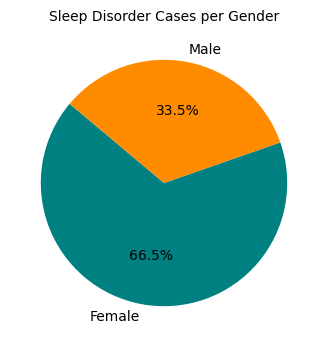

In [ ]:
sleeping_disorder_data = data[data['Sleep Disorder'] != 'None']
sleeping_disorder_gender_counts = sleeping_disorder_data['Gender'].value_counts()

plt.figure(figsize=(6, 4))
sleeping_disorder_gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, labels=sleeping_disorder_gender_counts.index, colors=['teal','darkorange'])
plt.title('Sleep Disorder Cases per Gender', fontsize=10)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [ ]:
occupation_counts = data['Occupation'].value_counts()
print(occupation_counts)
print('--------------------------------')
gender_counts = data['Gender'].value_counts()
print(gender_counts)
print('--------------------------------')
bmi_counts = data['BMI Category'].value_counts()
print(bmi_counts)
print('--------------------------------')

# Create Age Groups
bins = [18, 30, 40, 50, 100]
labels = ['18-29', '30-39', '40-49', '50+']

data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

age_counts = data['Age Group'].value_counts()
print(age_counts)
data.drop(columns=['Age Group'],inplace=True)

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64
--------------------------------
Male      189
Female    185
Name: Gender, dtype: int64
--------------------------------
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64
--------------------------------
30-39    142
40-49    117
50+       96
18-29     19
Name: Age Group, dtype: int64


Age and Gender data look balanced since it's expected to have most data for the ages ranging from 30 to 50. Occupations on the other hand are not very balanced and it can possibly impact our model's performance.
- Software Engineer, Scientist, Sales Representative, Manager all have < 5 data occurencies

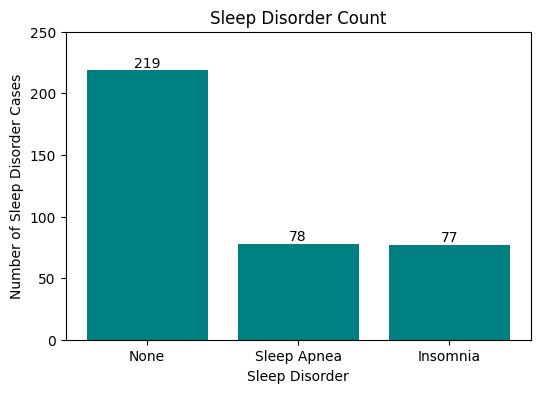

In [ ]:
target_counts = data['Sleep Disorder'].value_counts()

plt.figure(figsize=(6, 4))

bars = plt.bar(target_counts.index, target_counts.values, color='teal')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), va='bottom', ha='center', fontsize=10)

plt.title('Sleep Disorder Count')
plt.xlabel('Sleep Disorder')
plt.ylabel('Number of Sleep Disorder Cases')
plt.ylim(0, 250)
plt.xticks()
plt.show()

Most of the occurencies don't have a sleep disorder, while the 2 sleep disorders record count is almost equal

# 2. Data Preprocessing

**Apply One Hot Vector for BMA Category and Occupation**

In [ ]:
one_hot_vector_columns = ['BMI Category', 'Occupation']

one_hot_vector_data = pd.get_dummies(data, columns=one_hot_vector_columns)

one_hot_vector_data.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,Male,27,6.1,6,42,6,126/83,77,4200,...,0,0,0,0,0,0,0,0,1,0
1,2,Male,28,6.2,6,60,8,125/80,75,10000,...,1,0,0,0,0,0,0,0,0,0
2,3,Male,28,6.2,6,60,8,125/80,75,10000,...,1,0,0,0,0,0,0,0,0,0
3,4,Male,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0
4,5,Male,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0


**Map Gender values**

In [ ]:
one_hot_vector_data['Gender'] = one_hot_vector_data['Gender'].replace({'Male': 0, 'Female': 1})

one_hot_vector_data.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,0,27,6.1,6,42,6,126/83,77,4200,...,0,0,0,0,0,0,0,0,1,0
1,2,0,28,6.2,6,60,8,125/80,75,10000,...,1,0,0,0,0,0,0,0,0,0
2,3,0,28,6.2,6,60,8,125/80,75,10000,...,1,0,0,0,0,0,0,0,0,0
3,4,0,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0


**Map Sleeping Disorder**

In [ ]:
one_hot_vector_data['Sleep Disorder'] = one_hot_vector_data['Sleep Disorder'].replace({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})

one_hot_vector_data.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Blood Pressure,Heart Rate,Daily Steps,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,1,0,27,6.1,6,42,6,126/83,77,4200,...,0,0,0,0,0,0,0,0,1,0
1,2,0,28,6.2,6,60,8,125/80,75,10000,...,1,0,0,0,0,0,0,0,0,0
2,3,0,28,6.2,6,60,8,125/80,75,10000,...,1,0,0,0,0,0,0,0,0,0
3,4,0,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0
4,5,0,28,5.9,4,30,8,140/90,85,3000,...,0,0,0,0,0,1,0,0,0,0


**Split Blood Pressure into 2 columns**

In [ ]:
blood_pressure_split = one_hot_vector_data['Blood Pressure'].str.split('/', expand=True)

one_hot_vector_data['Systolic BP'] = pd.to_numeric(blood_pressure_split[0])
one_hot_vector_data['Diastolic BP'] = pd.to_numeric(blood_pressure_split[1])

one_hot_vector_data.drop('Blood Pressure', axis=1, inplace=True)
one_hot_vector_data.head()

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Systolic BP,Diastolic BP
0,1,0,27,6.1,6,42,6,77,4200,0,...,0,0,0,0,0,0,1,0,126,83
1,2,0,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,125,80
2,3,0,28,6.2,6,60,8,75,10000,0,...,0,0,0,0,0,0,0,0,125,80
3,4,0,28,5.9,4,30,8,85,3000,2,...,0,0,0,1,0,0,0,0,140,90
4,5,0,28,5.9,4,30,8,85,3000,2,...,0,0,0,1,0,0,0,0,140,90


**Apply MinMaxScaler**

In [ ]:
features_to_normalize = one_hot_vector_data.drop(['Sleep Disorder','Person ID'], axis=1)

scaler = MinMaxScaler()

normalized_features = scaler.fit_transform(features_to_normalize)
normalized_data = pd.DataFrame(normalized_features, columns=features_to_normalize.columns)
normalized_data.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category_Normal,BMI Category_Normal Weight,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Systolic BP,Diastolic BP
0,0.0,0.00000,0.111111,0.4,0.2,0.6,0.571429,0.171429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.407407,0.40
1,0.0,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370370,0.25
2,0.0,0.03125,0.148148,0.4,0.5,1.0,0.476190,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370370,0.25
3,0.0,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.925926,0.75
4,0.0,0.03125,0.037037,0.0,0.0,1.0,0.952381,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.925926,0.75


# 3. Gaussian Naïve Bayes & Support Vector Classifier Classification

In [ ]:
target = one_hot_vector_data['Sleep Disorder']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(normalized_data, target, test_size=0.3, random_state=0)

# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Support Vector Classifier
svc = SVC(probability=True, random_state=0)
svc.fit(X_train, y_train)

# Predict
y_pred_gnb = gnb.predict(X_test)
y_pred_svc = svc.predict(X_test)

# Calculate Metrics
metrics = {
    'Model': ['Naive Bayes', 'SVM'],
    'Accuracy': [accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_svc)],
    'F1 Macro': [f1_score(y_test, y_pred_gnb, average='macro'), f1_score(y_test, y_pred_svc, average='macro')],
    'F1 Micro': [f1_score(y_test, y_pred_gnb, average='micro'), f1_score(y_test, y_pred_svc, average='micro')],
    'Precision': [precision_score(y_test, y_pred_gnb, average='macro'), precision_score(y_test, y_pred_svc, average='macro')],
    'Recall': [recall_score(y_test, y_pred_gnb, average='macro'), recall_score(y_test, y_pred_svc, average='macro')]
}

# Creating a DataFrame to display the results
results_df = pd.DataFrame(metrics)

results_df

,Model,Accuracy,F1 Macro,F1 Micro,Precision,Recall
0,Naive Bayes,0.876106,0.847475,0.876106,0.850205,0.846728
1,SVM,0.893805,0.863938,0.893805,0.872316,0.856829


In [ ]:
class_names = ['None', 'Insomnia', 'Sleep Apnea']

classification_report_gnb = classification_report(y_test, y_pred_gnb, target_names=class_names)
classification_report_svc = classification_report(y_test, y_pred_svc, target_names=class_names)

print(classification_report_gnb)
print(classification_report_svc)

              precision    recall  f1-score   support

        None       0.92      0.92      0.92        66
    Insomnia       0.86      0.78      0.82        23
 Sleep Apnea       0.77      0.83      0.80        24

    accuracy                           0.88       113
   macro avg       0.85      0.85      0.85       113
weighted avg       0.88      0.88      0.88       113

              precision    recall  f1-score   support

        None       0.93      0.95      0.94        66
    Insomnia       0.86      0.78      0.82        23
 Sleep Apnea       0.83      0.83      0.83        24

    accuracy                           0.89       113
   macro avg       0.87      0.86      0.86       113
weighted avg       0.89      0.89      0.89       113



**Generate Confusion Matrix**

In [ ]:
confusion_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

def analyze_confusion_matrix(conf_matrix, class_names):
    # Summing the columns to get False Positives
    false_positives = np.sum(conf_matrix, axis=0) - np.diag(conf_matrix)
    # Diagonal elements are True Positives
    true_positives = np.diag(conf_matrix)

    max_false_positives_class = class_names[false_positives.argmax()]
    max_true_positives_class = class_names[true_positives.argmax()]

    return max_false_positives_class, max_true_positives_class

max_fp_gnb, max_tp_gnb = analyze_confusion_matrix(confusion_matrix_gnb, class_names)
max_fp_svc, max_tp_svc = analyze_confusion_matrix(confusion_matrix_svc, class_names)

print(confusion_matrix_gnb, '\n\nMost False Positives:', max_fp_gnb,'\nMost True Positives:', max_tp_gnb, '\n')
print(confusion_matrix_svc, '\n\nMost False Positives:', max_fp_svc,'\nMost True Positives:', max_tp_svc)

[[61  2  3]
 [ 2 18  3]
 [ 3  1 20]] 

Most False Positives: Sleep Apnea 
Most True Positives: None 

[[63  2  1]
 [ 2 18  3]
 [ 3  1 20]] 

Most False Positives: None 
Most True Positives: None


- **True Positives** (TP): Instances where the model correctly predicts the presence of a specific sleep disorder.
- **True Negatives** (TN): Instances where the model correctly predicts the absence of a sleep disorder.
- **False Positives** (FP): Instances where the model incorrectly predicts the presence of a sleep disorder when it actually doesn't exist.
- **False Negatives** (FN): Instances where the model incorrectly predicts the absence of a sleep disorder when it actually exists.

# 4. Decision Threshold Calibration

**Update target to contain 2 classes (0 stays as None and 1 is now for Both Sleep Orders)

In [ ]:
binary_target = target.replace({2: 1})
binary_target_counts = binary_target.value_counts()
print(binary_target_counts)

0    219
1    155
Name: Sleep Disorder, dtype: int64


> The dataset is not imbalanced

**Predict Probability**

In [ ]:
normalized_data

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Category_Normal,BMI Category_Normal Weight,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Systolic BP,Diastolic BP
0,0.0,0.00000,0.111111,0.4,0.20,0.6,0.571429,0.171429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.407407,0.40
1,0.0,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370370,0.25
2,0.0,0.03125,0.148148,0.4,0.50,1.0,0.476190,1.000000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.370370,0.25
3,0.0,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.925926,0.75
4,0.0,0.03125,0.037037,0.0,0.00,1.0,0.952381,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.925926,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.0,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925926,1.00
370,1.0,1.00000,0.814815,1.0,0.75,0.0,0.142857,0.571429,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925926,1.00
371,1.0,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925926,1.00
372,1.0,1.00000,0.851852,1.0,0.75,0.0,0.142857,0.571429,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.925926,1.00


In [ ]:
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(normalized_data, binary_target, test_size=0.3, random_state=0)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_binary, y_train_binary.values)  # Fit model to training data

# Support Vector Classifier
svc = SVC(probability=True, random_state=0)
svc.fit(X_train_binary, y_train_binary.values)  # Fit model to training data

# Probabilities
gnb_probs = gnb.predict_proba(X_test_binary)
svc_probs = svc.predict_proba(X_test_binary)

# Predictions
gnb_pred = gnb.predict(X_test_binary)
svc_pred = svc.predict(X_test_binary)

predictions_df = pd.DataFrame({
    'x_test - ID': np.concatenate([X_test_binary.index, X_test_binary.index]),
    'Classifier': ['GaussianNB'] * len(X_test_binary) + ['SVC'] * len(X_test_binary),
    'None Prob': np.concatenate([gnb_probs[:, 0], svc_probs[:, 0]]),
    'Disorder Prob': np.concatenate([gnb_probs[:, 1], svc_probs[:, 1]]),
    'y_pred': np.concatenate([gnb_pred, svc_pred])
})

top5_gnb = predictions_df[predictions_df['Classifier'] == 'GaussianNB'].head()
top5_svc = predictions_df[predictions_df['Classifier'] == 'SVC'].head()

top5_combined = pd.concat([top5_gnb, top5_svc])
top5_combined['None Prob'] = top5_combined['None Prob'].round(2)
top5_combined['Disorder Prob'] = top5_combined['Disorder Prob'].round(2)

top5_combined

,x_test - ID,Classifier,None Prob,Disorder Prob,y_pred
0,122,GaussianNB,1.00,0.00,0
1,295,GaussianNB,0.00,1.00,1
2,311,GaussianNB,1.00,0.00,0
3,210,GaussianNB,1.00,0.00,0
4,204,GaussianNB,1.00,0.00,0
113,122,SVC,0.94,0.06,0
114,295,SVC,0.10,0.90,1
115,311,SVC,0.10,0.90,1
116,210,SVC,0.94,0.06,0
117,204,SVC,0.62,0.38,0


In [ ]:
gnb_matrix = confusion_matrix(y_test_binary, gnb_pred)
svc_matrix = confusion_matrix(y_test_binary, svc_pred)

print("Gaussian Naive Bayes\n--------------------")
print("True Positives:", gnb_matrix[1, 1])
print("True Negatives:", gnb_matrix[0, 0])
print("False Positives:", gnb_matrix[0, 1])
print("False Negatives:", gnb_matrix[1, 0])
print('\n')
print("Support Vector Classifier\n-------------------------")
print("True Positives:", svc_matrix[1, 1])
print("True Negatives:", svc_matrix[0, 0])
print("False Positives:", svc_matrix[0, 1])
print("False Negatives:", svc_matrix[1, 0])

Gaussian Naive Bayes
--------------------
True Positives: 40
True Negatives: 63
False Positives: 3
False Negatives: 7


Support Vector Classifier
-------------------------
True Positives: 42
True Negatives: 60
False Positives: 6
False Negatives: 5
